# Practical example

## Importing the relevant libraries

In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Loading the raw data

In [358]:
raw_data=pd.read_csv("1.04.+Real-life+example.csv")

## Preprocessing

### Exploring the descriptive statistics of the variables

In [359]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [360]:
data=raw_data.copy()

### Dealing with missing values

In [361]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [362]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [363]:
data_no_mv=data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Exploring the PDFs

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

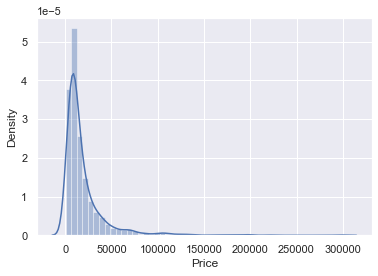

In [364]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [365]:
q=data_no_mv['Price'].quantile(0.99)
data1=data_no_mv[data_no_mv['Price']<q]
data1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

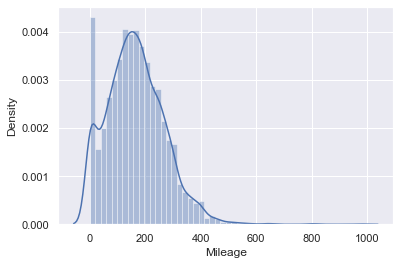

In [366]:
sns.distplot(data1['Mileage'])

In [367]:
q=data1['Mileage'].quantile(0.99)
data2=data1[data1['Mileage']<q]
data2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000,3944
unique,7,NaN,6,NaN,NaN,4,2,NaN,299
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN,185
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959,NaN
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


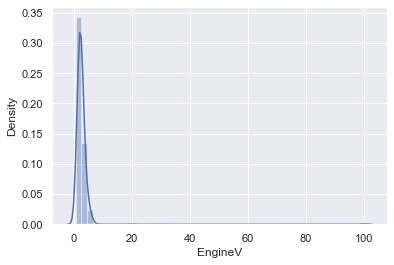

In [368]:
sns.distplot(data2['EngineV'])
data3=data2[data2['EngineV']<6.5]

In [369]:
data3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000,3921
unique,7,NaN,6,NaN,NaN,4,2,NaN,298
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN,185
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019,NaN
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000,NaN


In [370]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

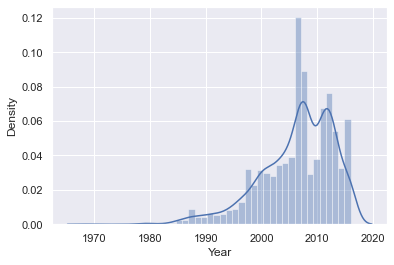

In [371]:
sns.distplot(data3['Year'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

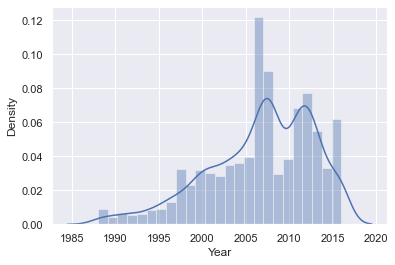

In [372]:
q=data3['Year'].quantile(0.01)
data4=data3[data3['Year']>q]
sns.distplot(data4['Year'])

In [373]:
data4.describe()

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


In [374]:
data_cleaned=data4.reset_index(drop=True)

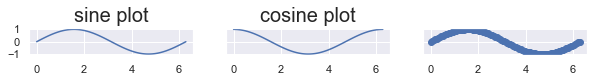

In [375]:
x=np.linspace(0,2*np.pi,100)
y=np.sin(x)
fig,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(10,0.5))
ax1.plot(x,y)
ax1.set_title('sine plot',fontsize=20)
ax2.plot(x,np.cos(x))
ax2.set_title("cosine plot",fontsize=20)
ax3.scatter(x,y)


<h1><strong>Some practice with subplots</strong></h1>

(<Figure size 432x288 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

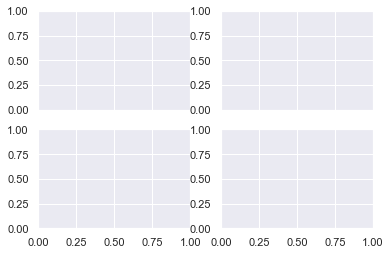

In [376]:
 plt.subplots(2, 2, sharex='col')

(<Figure size 432x288 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

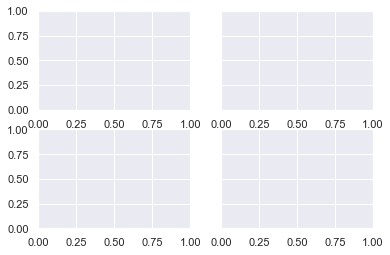

In [377]:
plt.subplots(2, 2, sharey='row')


(<Figure size 432x288 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

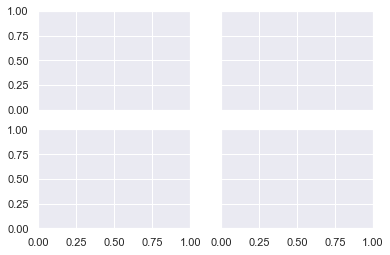

In [378]:
plt.subplots(2, 2, sharex=True, sharey=True)

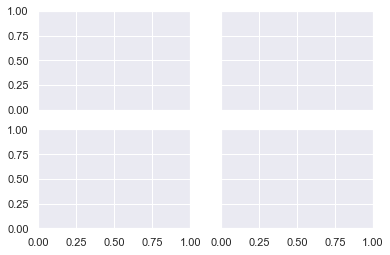

In [379]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,sharex='all',sharey='all')

## Checking the OLS assumptions

In [380]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3867 non-null   object 
 1   Price         3867 non-null   float64
 2   Body          3867 non-null   object 
 3   Mileage       3867 non-null   int64  
 4   EngineV       3867 non-null   float64
 5   Engine Type   3867 non-null   object 
 6   Registration  3867 non-null   object 
 7   Year          3867 non-null   int64  
 8   Model         3867 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 272.0+ KB


Text(0.5, 1.0, 'Price and Year')

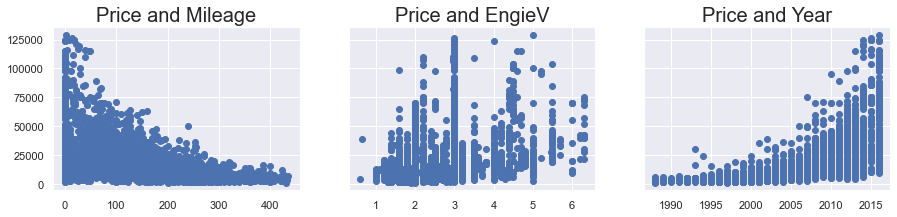

In [381]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax1.set_title('Price and Mileage',fontsize=20)
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngieV',fontsize=20)
ax3.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax3.set_title('Price and Year',fontsize=20)

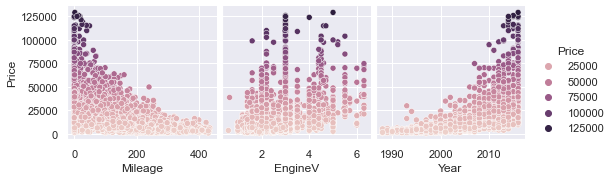

In [382]:
sns.pairplot(data_cleaned,y_vars=['Price'],x_vars=['Mileage','EngineV','Year'],hue='Price')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

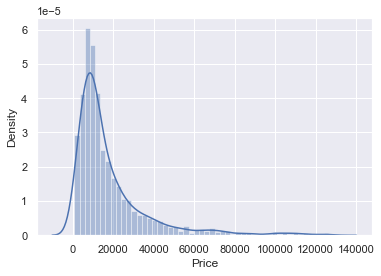

In [383]:
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

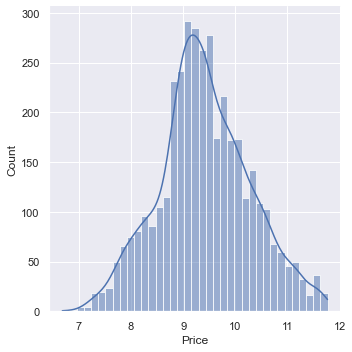

In [384]:
sns.displot(np.log(data_cleaned['Price']),kde=True)

In [385]:
data_cleaned['Log_Price']=np.log(data_cleaned['Price'])
data_cleaned.describe()

,Price,Mileage,EngineV,Year,Log_Price
count,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853,9.415703
std,19085.855165,95.633291,0.949366,6.103870,0.876616
min,800.000000,0.000000,0.600000,1988.000000,6.684612
25%,7200.000000,91.000000,1.800000,2003.000000,8.881836
50%,11700.000000,157.000000,2.200000,2008.000000,9.367344
75%,21700.000000,225.000000,3.000000,2012.000000,9.985068
max,129222.000000,435.000000,6.300000,2016.000000,11.769287


In [386]:
data_cleaned_relaxed=data_cleaned.drop(['Price'],axis=1)
data_cleaned_relaxed.describe()

,Mileage,EngineV,Year,Log_Price
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,160.542539,2.450440,2006.709853,9.415703
std,95.633291,0.949366,6.103870,0.876616
min,0.000000,0.600000,1988.000000,6.684612
25%,91.000000,1.800000,2003.000000,8.881836
50%,157.000000,2.200000,2008.000000,9.367344
75%,225.000000,3.000000,2012.000000,9.985068
max,435.000000,6.300000,2016.000000,11.769287


### Multicollinearity

In [387]:
data_cleaned_relaxed.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'Log_Price'], dtype=object)

,Mileage,EngineV,Year
Mileage,1.000000,0.005710,-0.715361
EngineV,0.005710,1.000000,-0.020152
Year,-0.715361,-0.020152,1.000000


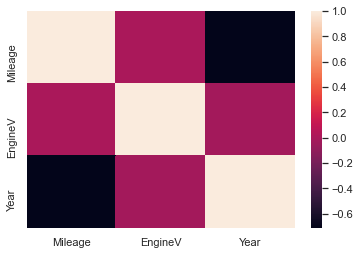

In [388]:
df=data_cleaned_relaxed.drop(["Log_Price"],axis=1)
sns.heatmap(df.corr())
df.corr()

In [389]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [390]:
# as numerical variables preprocessed till now so will include only numerical var
variables=data_cleaned_relaxed[['Mileage','EngineV','Year']]
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

,vif,Features
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Year


In [391]:
data_no_multicoll_num=data_cleaned_relaxed.drop(['Year'],axis=1)
data_no_multicoll_num.head()
data_no_multicoll_num.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,Rav 4,9.814656


## Create dummy variables

<!-- https://github.com/shakedzy/dython -->
<!-- https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9 -->

In [392]:
pip install dython

Note: you may need to restart the kernel to use updated packages.


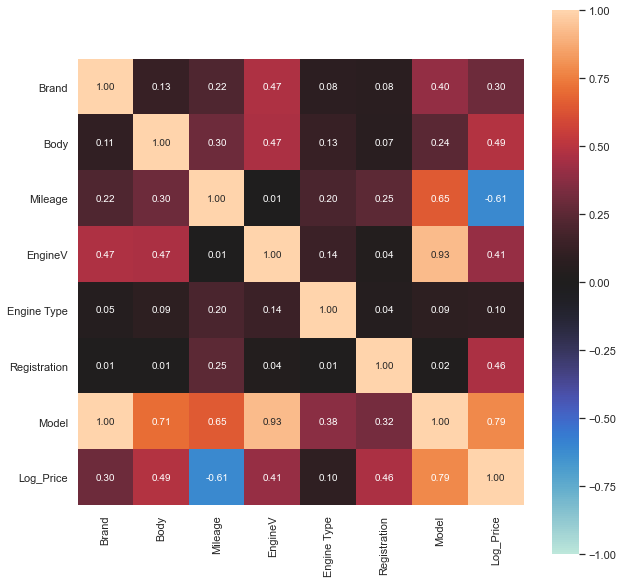

In [393]:
from dython.nominal import associations
variables=data_no_multicoll_num
out=associations(variables,figsize=(10,10),nom_nom_assoc='theil')

Thiels U vs Cramers V is V(X,Y)=V(Y,X), any information related to asymmetry is lost but
U(X,Y)!=U(Y,X) for example
Model has perfect multicollinearity with brand of 1.00
whereas brand has 0.4 multicollinearity with model
also log_price has strong relation with model and and not brand so drop it

In [502]:
data_no_multicoll=data_no_multicoll_num.drop(['Brand','EngineV','Body','Mileage'],axis=1)

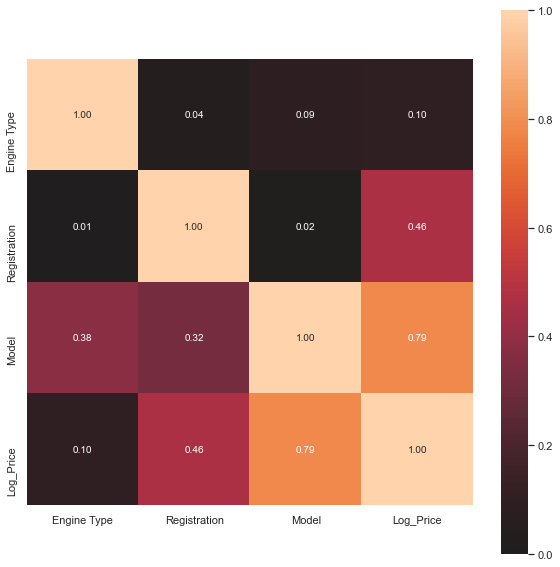

In [503]:
out=associations(data_no_multicoll,figsize=(10,10),nom_nom_assoc='theil')

In [504]:
data_with_dummies=pd.get_dummies(data_no_multicoll,drop_first=True)
data_with_dummies.describe()

,Log_Price,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,Model_100,Model_11,Model_116,Model_118,Model_120,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
count,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,...,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000
mean,9.415703,0.146884,0.025601,0.360228,0.906387,0.003879,0.000259,0.000776,0.001034,0.000259,...,0.039824,0.002845,0.002845,0.028446,0.001810,0.009568,0.000776,0.003620,0.000259,0.001293
std,0.876616,0.354036,0.157963,0.480128,0.291327,0.062169,0.016081,0.027846,0.032150,0.016081,...,0.195571,0.053266,0.053266,0.166264,0.042513,0.097360,0.027846,0.060068,0.016081,0.035940
min,6.684612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.881836,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.367344,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.985068,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11.769287,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [505]:
# <!-- variables=data_with_dummies -->
# <!-- vif=pd.DataFrame() -->
# <!-- vif['vif']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])] -->
# <!-- vif['features']=variables.columns -->

In [506]:
# pd.options.display.max_rows = 999
# df=data_with_dummies.drop(['Log_Price'],axis=1)
# sns.heatmap(df.corr())
# this didn.t work due to perfect multicoll b/w brand and model

### Rearrange a bit

In [507]:
data_with_dummies.columns.values

array(['Log_Price', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes', 'Model_100', 'Model_11',
       'Model_116', 'Model_118', 'Model_120', 'Model_19', 'Model_190',
       'Model_200', 'Model_210', 'Model_220', 'Model_230', 'Model_25',
       'Model_250', 'Model_300', 'Model_316', 'Model_318', 'Model_320',
       'Model_323', 'Model_325', 'Model_328', 'Model_330', 'Model_335',
       'Model_4 Series Gran Coupe', 'Model_428', 'Model_4Runner',
       'Model_5 Series', 'Model_5 Series GT', 'Model_520', 'Model_523',
       'Model_524', 'Model_525', 'Model_528', 'Model_530', 'Model_535',
       'Model_540', 'Model_545', 'Model_550', 'Model_6 Series Gran Coupe',
       'Model_630', 'Model_640', 'Model_645', 'Model_650', 'Model_730',
       'Model_735', 'Model_740', 'Model_745', 'Model_750', 'Model_760',
       'Model_80', 'Model_9', 'Model_90', 'Model_A 140', 'Model_A 150',
       'Model_A 170', 'Model_A 180', 'Model_A1', 'Model_A3', 'Model_A4',
      

In [508]:
col=[  'Log_Price', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes', 'Model_100', 'Model_11',
       'Model_116', 'Model_118', 'Model_120', 'Model_19', 'Model_190',
       'Model_200', 'Model_210', 'Model_220', 'Model_230', 'Model_25',
       'Model_250', 'Model_300', 'Model_316', 'Model_318', 'Model_320',
       'Model_323', 'Model_325', 'Model_328', 'Model_330', 'Model_335',
       'Model_4 Series Gran Coupe', 'Model_428', 'Model_4Runner',
       'Model_5 Series', 'Model_5 Series GT', 'Model_520', 'Model_523',
       'Model_524', 'Model_525', 'Model_528', 'Model_530', 'Model_535',
       'Model_540', 'Model_545', 'Model_550', 'Model_6 Series Gran Coupe',
       'Model_630', 'Model_640', 'Model_645', 'Model_650', 'Model_730',
       'Model_735', 'Model_740', 'Model_745', 'Model_750', 'Model_760',
       'Model_80', 'Model_9', 'Model_90', 'Model_A 140', 'Model_A 150',
       'Model_A 170', 'Model_A 180', 'Model_A1', 'Model_A3', 'Model_A4',
       'Model_A4 Allroad', 'Model_A5', 'Model_A6', 'Model_A6 Allroad',
       'Model_A7', 'Model_A8', 'Model_ASX', 'Model_Amarok', 'Model_Auris',
       'Model_Avalon', 'Model_Avensis', 'Model_Aygo', 'Model_B 170',
       'Model_B 180', 'Model_B 200', 'Model_Beetle', 'Model_Bora',
       'Model_C-Class', 'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG',
       'Model_CL 550', 'Model_CL 63 AMG', 'Model_CLA 200',
       'Model_CLA 220', 'Model_CLA-Class', 'Model_CLC 180',
       'Model_CLC 200', 'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230',
       'Model_CLK 240', 'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430',
       'Model_CLS 350', 'Model_CLS 400', 'Model_CLS 500',
       'Model_CLS 63 AMG', 'Model_Caddy', 'Model_Camry', 'Model_Captur',
       'Model_Caravelle', 'Model_Carina', 'Model_Carisma', 'Model_Celica',
       'Model_Clio', 'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
       'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
       'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
       'Model_I3', 'Model_IQ', 'Model_Jetta', 'Model_Kangoo',
       'Model_Koleos', 'Model_L 200', 'Model_LT', 'Model_Laguna',
       'Model_Lancer', 'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
       'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
       'Model_ML 63 AMG', 'Model_Master', 'Model_Matrix', 'Model_Megane',
       'Model_Modus', 'Model_Multivan', 'Model_New Beetle',
       'Model_Outlander', 'Model_Outlander XL', 'Model_Pajero',
       'Model_Pajero Pinin', 'Model_Pajero Sport', 'Model_Pajero Wagon',
       'Model_Passat B3', 'Model_Passat B4', 'Model_Passat B5',
       'Model_Passat B6', 'Model_Passat B7', 'Model_Passat B8',
       'Model_Passat CC', 'Model_Phaeton', 'Model_Pointer', 'Model_Polo',
       'Model_Previa', 'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7',
       'Model_R 320', 'Model_R8', 'Model_Rav 4', 'Model_S 140',
       'Model_S 250', 'Model_S 300', 'Model_S 320', 'Model_S 350',
       'Model_S 400', 'Model_S 430', 'Model_S 500', 'Model_S 550',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4',
       'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
       'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
       'Model_Symbol', 'Model_Syncro', 'Model_T3 (Transporter)',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_V 250',
       'Model_Vaneo', 'Model_Vento', 'Model_Venza', 'Model_Viano',
       'Model_Virage', 'Model_Vista', 'Model_Vito', 'Model_X1',
       'Model_X3', 'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_X6 M',
       'Model_Yaris', 'Model_Z3', 'Model_Z4']

In [509]:
data_preprocessed=data_with_dummies[col]
data_preprocessed.head()

,Log_Price,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,Model_100,Model_11,Model_116,Model_118,Model_120,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.495519,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
out=associations(data_preprocessed,figsize=(5,5),nom_nom_assoc='theil')

## Linear regression model

### Declare the inputs and the targets

In [510]:
targets=data_preprocessed['Log_Price']
x=data_preprocessed.drop(['Log_Price'],axis=1)

### Scale the data

In [511]:
from sklearn.preprocessing import StandardScaler

In [512]:
scaler=StandardScaler()

In [513]:
scaler.fit(x)

StandardScaler()

In [514]:
x_scaled=scaler.transform(x)

<h1> Train Test Split</h1>

In [515]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_scaled,targets,test_size=0.2,random_state=365)

### Create the regression

In [516]:
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [517]:
y_hat=reg.predict(X_train)

Text(0, 0.5, '(train_)target')

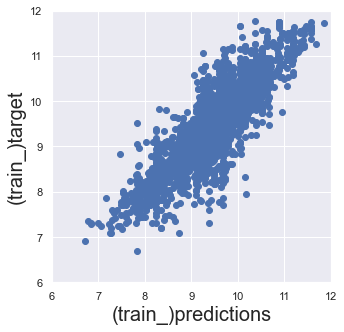

In [518]:
plt.figure(figsize=(5,5))
plt.scatter(y_hat,Y_train)
plt.xlim(6,12)
plt.ylim(6,12)
plt.xlabel("(train_)predictions",fontsize=20)
plt.ylabel("(train_)target",fontsize=20)

In [519]:
reg.score(X_train,Y_train)

0.7410535419463053

<h2>Finding the weights and bias</h2>

In [520]:
bias=reg.intercept_
bias

827161066143.3915

In [521]:
weights=reg.coef_

In [522]:
residuals=Y_train-y_hat

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Log_Price')

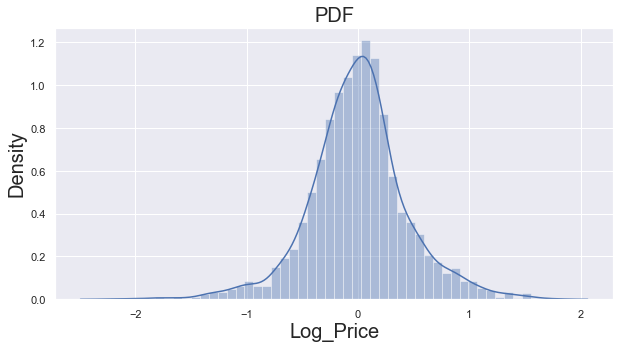

In [523]:
plt.figure(figsize=(10,5))
sns.distplot(residuals)
plt.title("PDF",fontsize=20)
plt.ylabel("Density",fontsize=20)
plt.xlabel("Log_Price",fontsize=20)

In [524]:
reg.score(X_train,Y_train)

0.7410535419463053

## Testing

In [526]:
bias=reg.intercept_

827161066143.3915

In [527]:
weights=reg.coef_

In [528]:
y_hat_test=reg.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

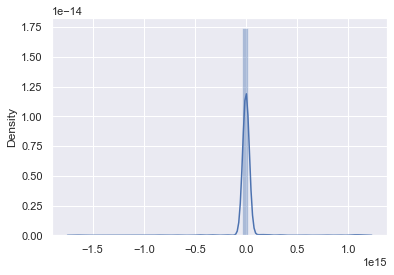

In [532]:
sns.distplot(y_hat_test)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Log_Price', ylabel='Density'>

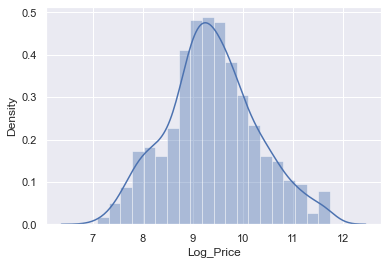

In [534]:
sns.distplot(Y_test)